# Task D

 **Comparing Discrete Fourier Transform **(DFT)** and Fast Fourier Transform **(FFT)** Performance** <br>
 The Fast Fourier Transform
 (FFT) is an efficient algorithm to compute the Discrete Fourier Transform (DFT) with significantly reduced computational cost,
 especially for input sizes that are powers of two. In this exercise, you will implement a naive DFT function and compare its execution
 time with NumPy’s FFT implementation (numpy.fft) for different input sizes.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.fft import fft
from numpy.fft import fft as np_fft
import timeit
from scipy.fft import ifft

#(a) Execution Time for Powers of Two Implement a naive DFT function in Python.

Compute the discrete Fourier Transform (DFT) of a 1D array x using a naive implementation.

In [2]:
def naive_dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

Compute the Fast Fourier Transform (FFT) of a 1D array x.

In [3]:
def numpy_fft(x):
    return fft(x)

Compute the amplitude and phase coefficients from the DFT or FFT output.

In [4]:
def compute_coefficients(transform_output):
    amplitude = np.abs(transform_output)
    phase = np.angle(transform_output)
    return amplitude, phase

Reconstruct the signal from amplitude and phase coefficients using inverse FFT.

In [5]:
def reconstruct_signal(coefficients, original_length):
    amplitude, phase = coefficients
    full_spectrum = amplitude * np.exp(1j * phase)
    reconstructed_signal = ifft(full_spectrum)
    return reconstructed_signal.real[:original_length]



 **• For input sizes $$ N = 2^{k}, k = 1,...,11 $$ measure the execution time of your DFT function and NumPy’s FFT.**

In [6]:
input_sizes = [2**k for k in range(1, 12)]

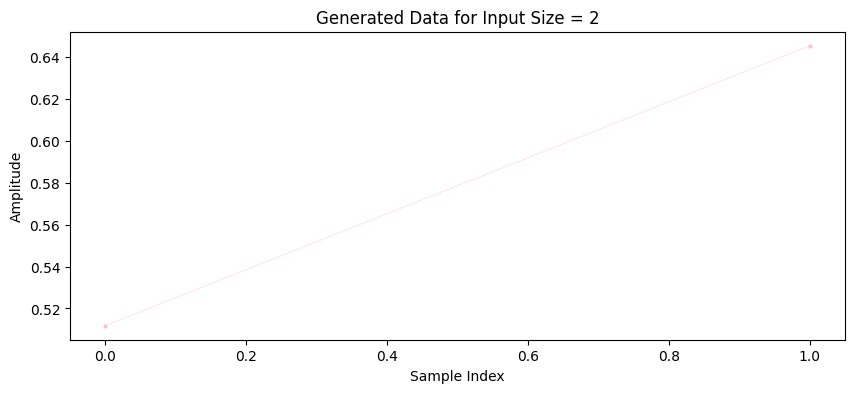

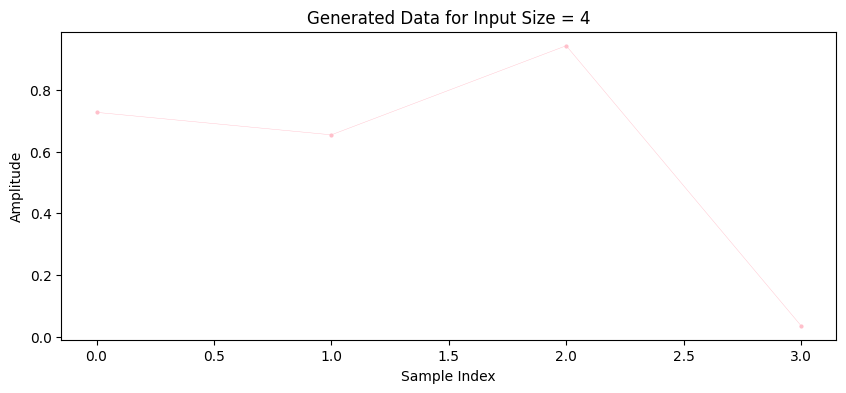

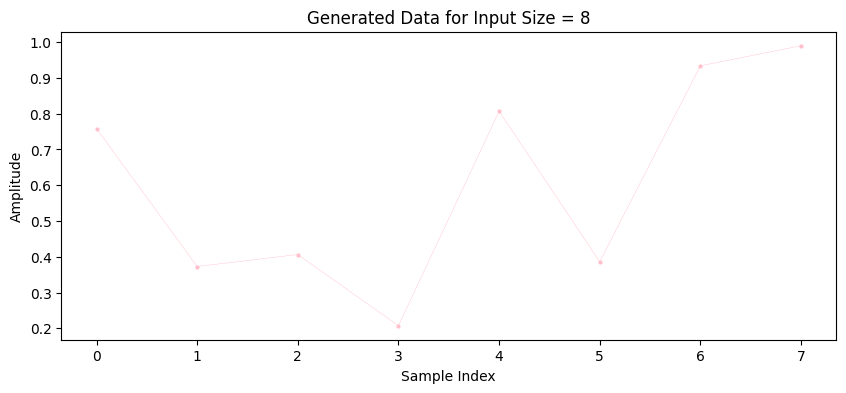

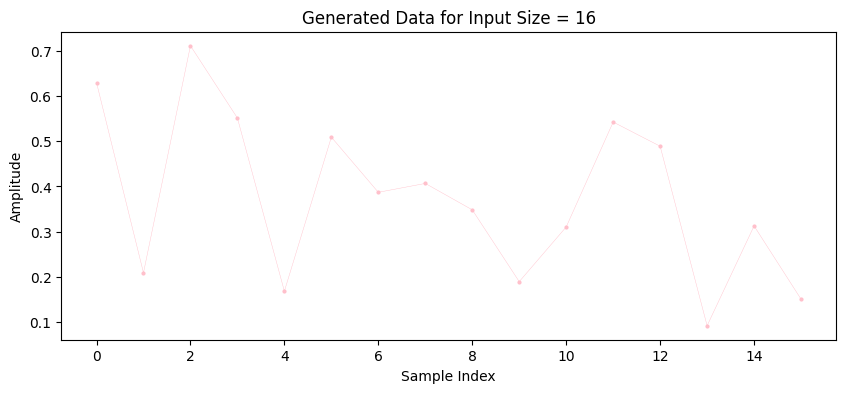

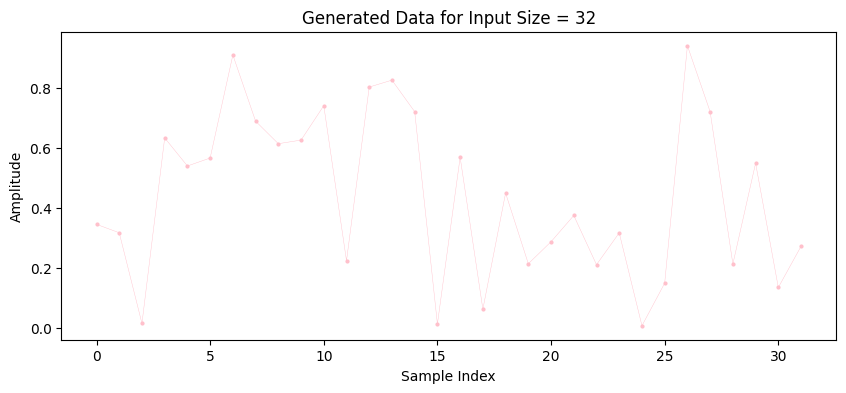

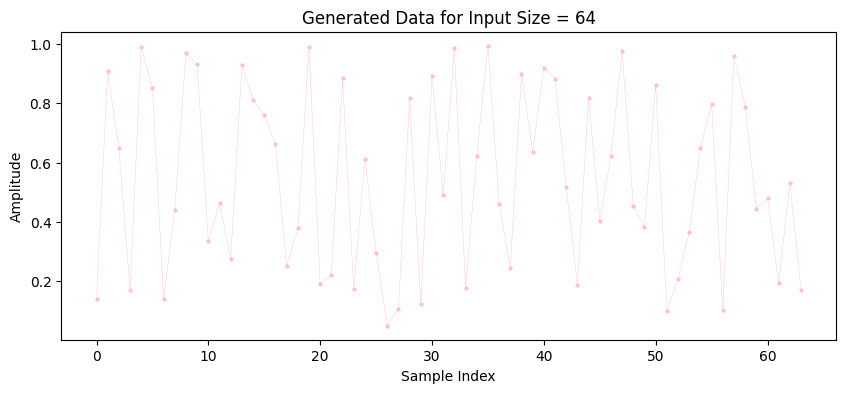

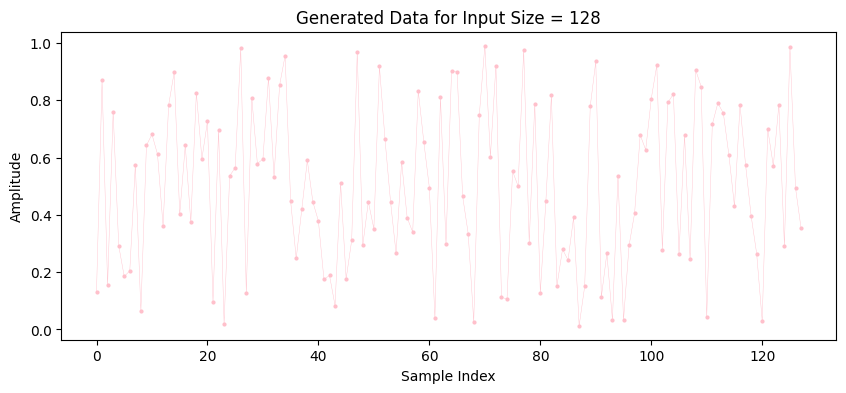

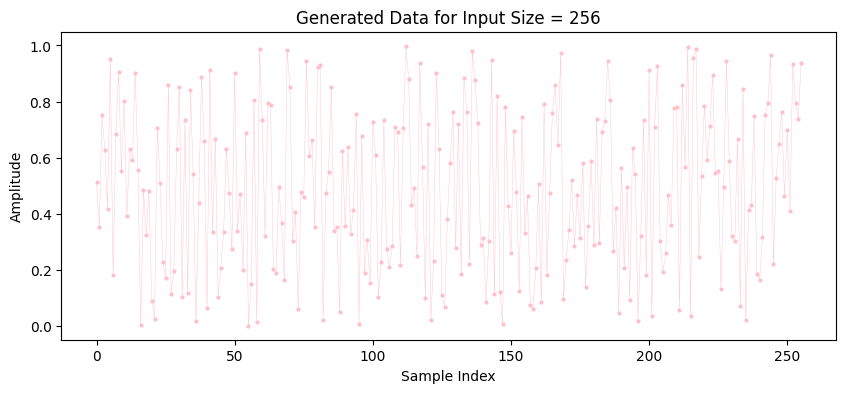

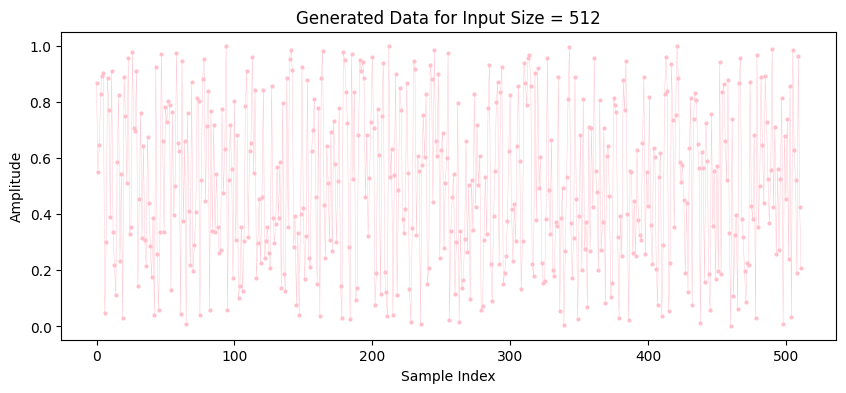

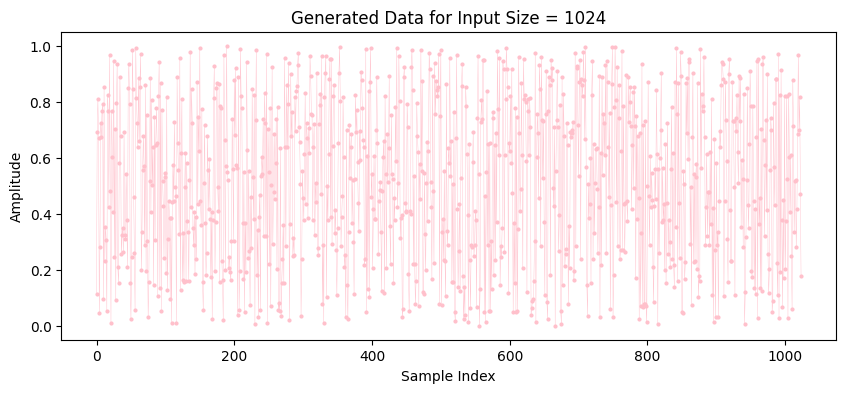

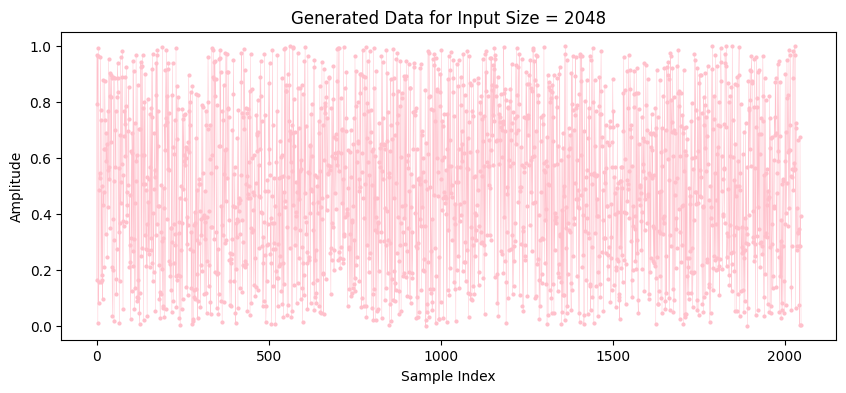

In [7]:
data = {size: np.random.rand(size) for size in input_sizes}

# Plot the generated data for each size
for size, signal in data.items():
    plt.figure(figsize=(10, 4))
    plt.plot(signal, marker='o', markersize=2, color='pink', linewidth=0.3)
    plt.title(f'Generated Data for Input Size = {size}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.show()

Measure execution time for each input size

In [8]:
dft_times = []
fft_times = []

for size in input_sizes:
    x = data[size]

    # Measure naive_dft time
    dft_time = timeit.timeit(lambda: naive_dft(x), number=10)
    dft_times.append(dft_time)

    # Measure numpy_fft time
    fft_time = timeit.timeit(lambda: numpy_fft(x), number=10)
    fft_times.append(fft_time)

Print execution times

In [9]:
print("Execution times (seconds):")
print("Input Size | Naive DFT | NumPy FFT")
print("----------------------------------")
for i, size in enumerate(input_sizes):
    print(f"{size:<10} | {dft_times[i]:<9.6f} | {fft_times[i]:<9.6f}")

Execution times (seconds):
Input Size | Naive DFT | NumPy FFT
----------------------------------
2          | 0.004295  | 0.000339 
4          | 0.000274  | 0.000154 
8          | 0.000321  | 0.000175 
16         | 0.000513  | 0.000170 
32         | 0.009388  | 0.000204 
64         | 0.134213  | 0.000268 
128        | 0.130159  | 0.000282 
256        | 0.382824  | 0.000304 
512        | 1.379067  | 0.000356 
1024       | 3.052631  | 0.000470 
2048       | 3.504024  | 0.000657 


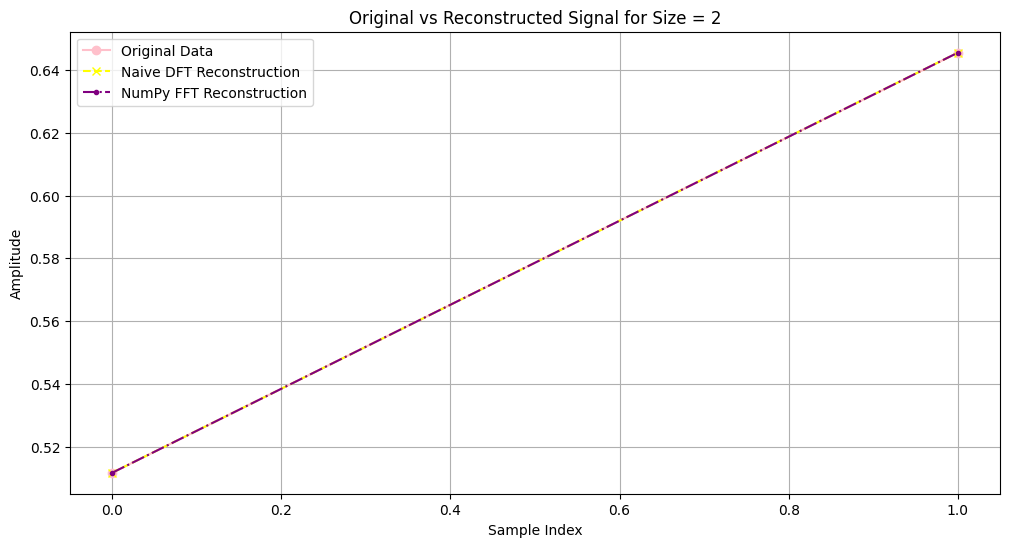

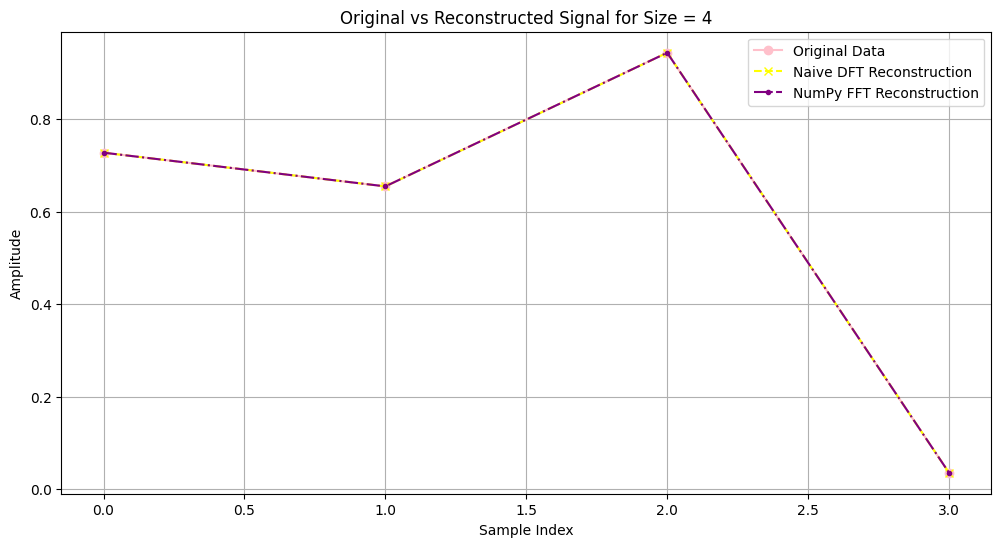

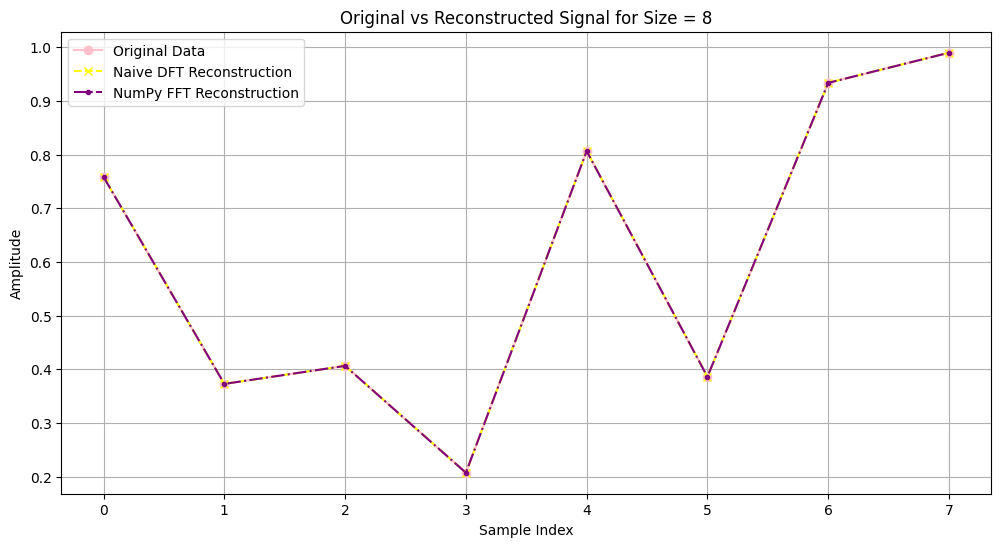

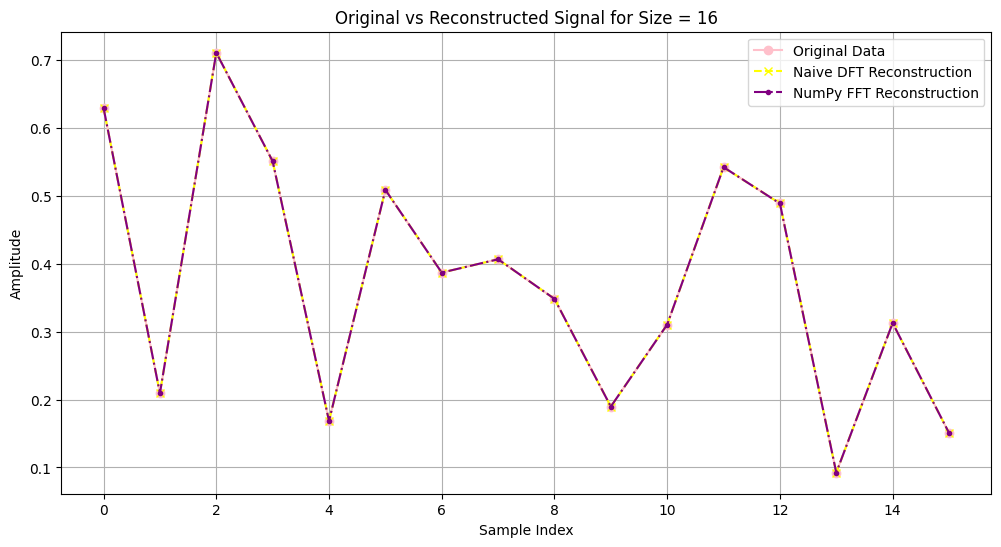

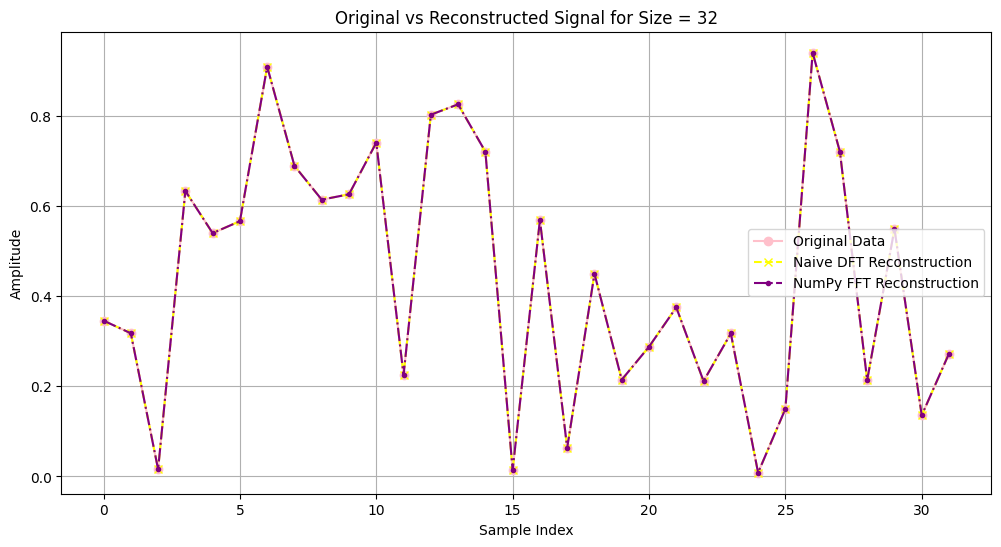

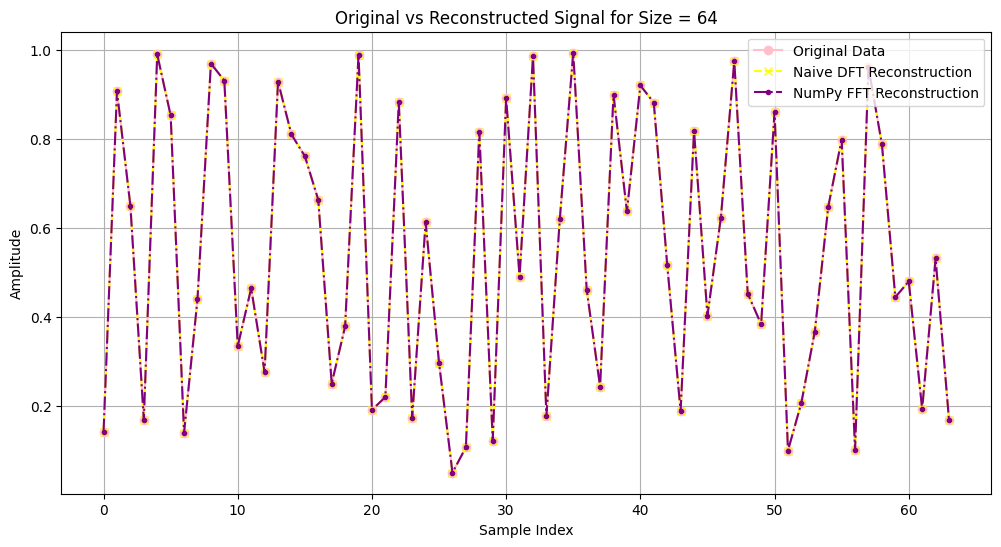

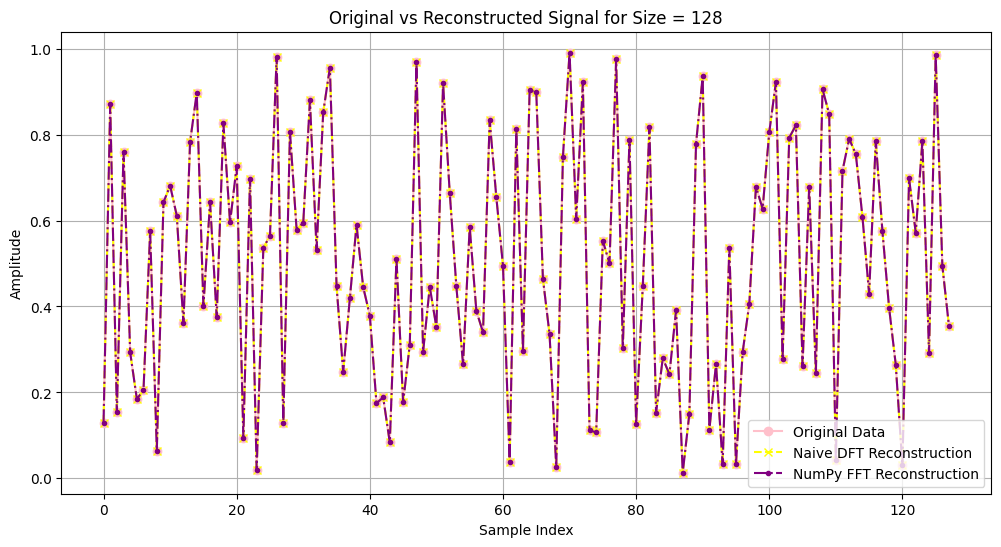

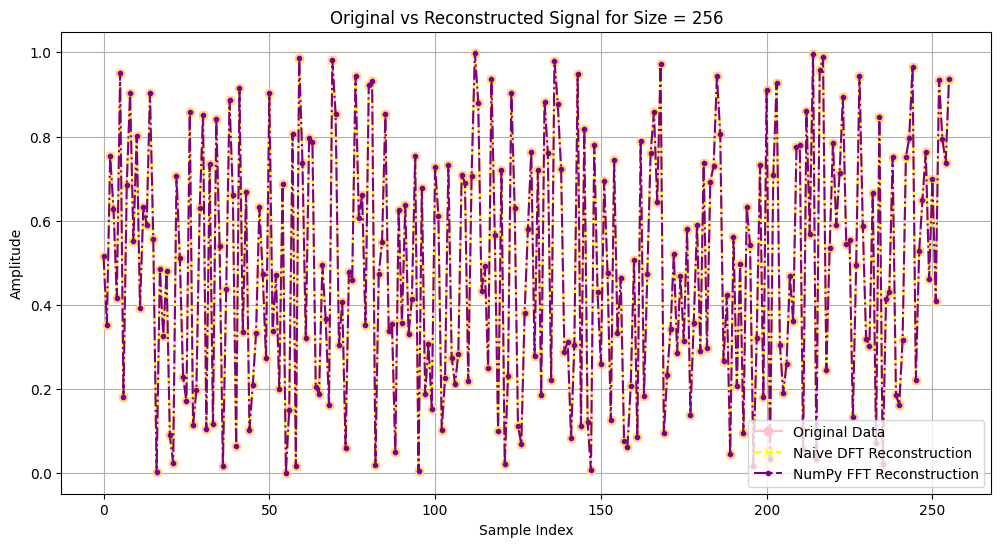

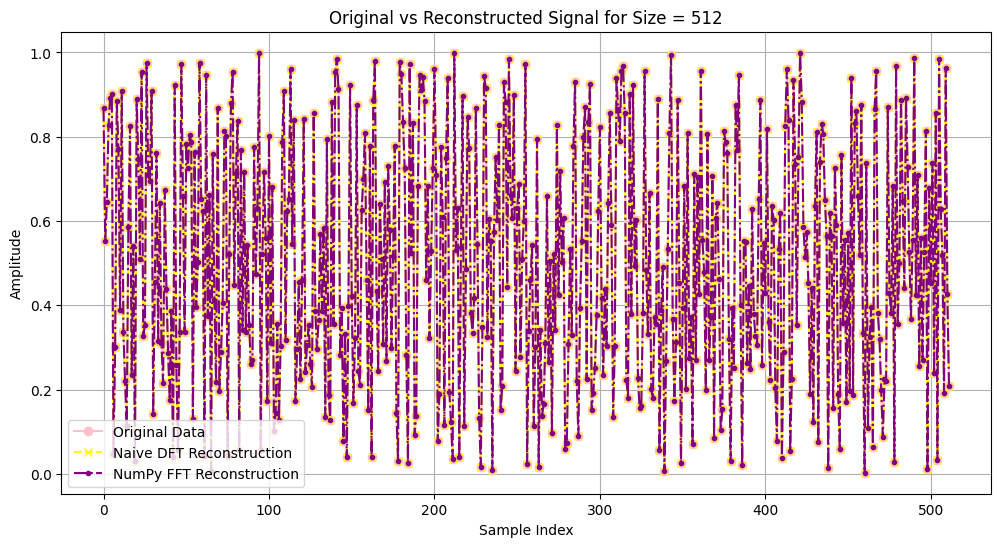

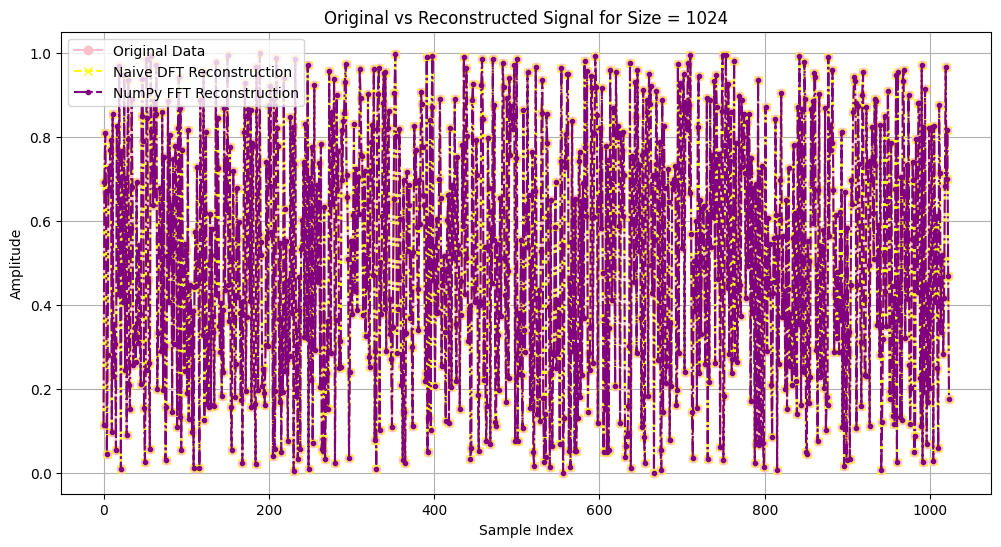

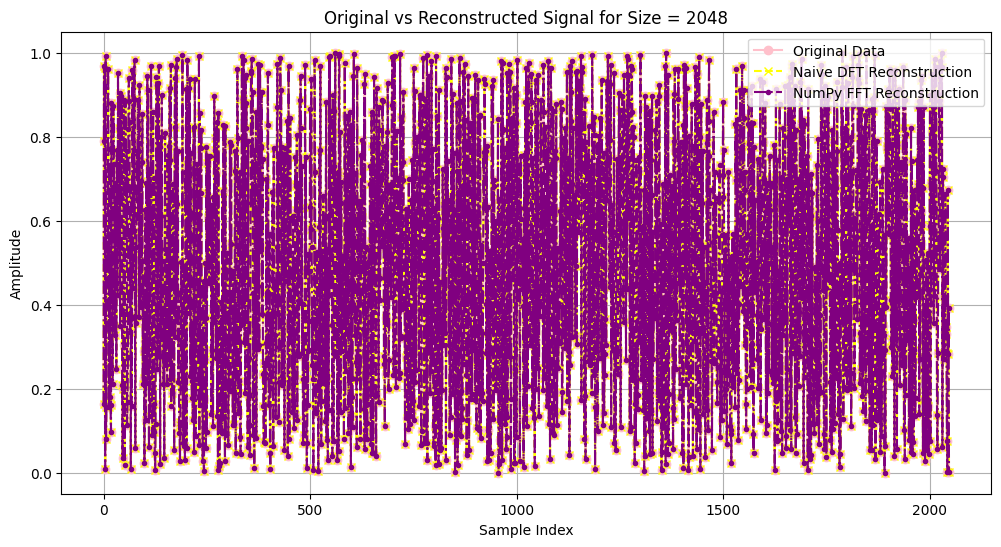

In [10]:
for size in input_sizes:
    x = data[size]

    # Compute Naive DFT and reconstruct
    dft_output = naive_dft(x)
    dft_coefficients = compute_coefficients(dft_output)
    dft_reconstructed = reconstruct_signal(dft_coefficients, size)

    # Compute NumPy FFT and reconstruct
    fft_output = numpy_fft(x)
    fft_coefficients = compute_coefficients(fft_output)
    fft_reconstructed = reconstruct_signal(fft_coefficients, size)

    # Plot the original and reconstructed signals
    plt.figure(figsize=(12, 6))
    plt.plot(x, marker='o', linestyle='-', label='Original Data', color='pink')
    plt.plot(dft_reconstructed, marker='x', linestyle='--', label='Naive DFT Reconstruction', color='yellow')
    plt.plot(fft_reconstructed, marker='.', linestyle='-.', label='NumPy FFT Reconstruction', color='purple')
    plt.title(f'Original vs Reconstructed Signal for Size = {size}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

**• Plot the execution times on a single figure (logarithmic scale is recommended for clarity).**

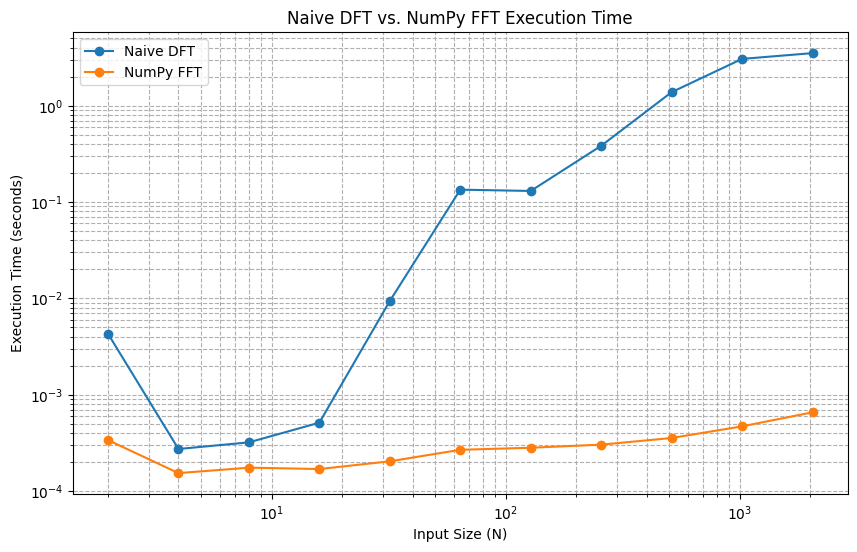

In [11]:
# Plot the execution times
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, dft_times, marker='o', linestyle='-', label='Naive DFT')
plt.plot(input_sizes, fft_times, marker='o', linestyle='-', label='NumPy FFT')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Naive DFT vs. NumPy FFT Execution Time')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()

**• Comment on how the execution time scales with N for both implementations.**

**• Comment on how the execution time scales with N for both implementations.**

Based on the execution times and the plot, we can observe the following:

* **Naive DFT:** The execution time for the naive DFT increases significantly as the input size (N) grows. This growth appears to be approximately proportional to N^2, which is expected for a direct implementation of the DFT. As N doubles, the execution time roughly quadruples.

* **NumPy FFT:** The execution time for NumPy's FFT also increases with N, but at a much slower rate compared to the naive DFT. The FFT algorithm has a time complexity of O(N log N), which is significantly more efficient for larger input sizes. The plot clearly shows that the FFT execution time remains relatively low even for the largest input sizes tested, while the naive DFT time becomes prohibitively long.

This demonstrates the significant performance advantage of the FFT algorithm over the naive DFT, especially for larger datasets.

# (b) Execution Time for Non-Powers of Two

**• Repeat the experiment for input sizes N = 2k + 2, k = 1,...,11, i.e., non-powers-of-two sizes.**

In [12]:
input_sizes_non_power = [2**k + 2 for k in range(1, 12)]


In [13]:
data_non_power = {size: np.random.rand(size) for size in input_sizes_non_power}

Measure execution time for each non-power-of-two input size

In [14]:
dft_times_non_power = []
fft_times_non_power = []

for size in input_sizes_non_power:
    x = data_non_power[size]

    # Measure naive_dft time
    dft_time = timeit.timeit(lambda: naive_dft(x), number=10)
    dft_times_non_power.append(dft_time)

    # Measure numpy_fft time
    fft_time = timeit.timeit(lambda: numpy_fft(x), number=10)
    fft_times_non_power.append(fft_time)

Print execution times for non-power-of-two input sizes

In [15]:
print("Execution times (seconds) for non-power-of-two sizes:")
print("Input Size | Naive DFT | NumPy FFT")
print("----------------------------------")
for i, size in enumerate(input_sizes_non_power):
    print(f"{size:<10} | {dft_times_non_power[i]:<9.6f} | {fft_times_non_power[i]:<9.6f}")

Execution times (seconds) for non-power-of-two sizes:
Input Size | Naive DFT | NumPy FFT
----------------------------------
4          | 0.000958  | 0.000218 
6          | 0.000295  | 0.000189 
10         | 0.000379  | 0.000190 
18         | 0.000356  | 0.000104 
34         | 0.000781  | 0.000109 
66         | 0.004125  | 0.000229 
130        | 0.015574  | 0.000248 
258        | 0.060206  | 0.000344 
514        | 0.237931  | 0.001490 
1026       | 1.031354  | 0.000704 
2050       | 4.241501  | 0.000850 


Plot the execution times for non-power-of-two input sizes

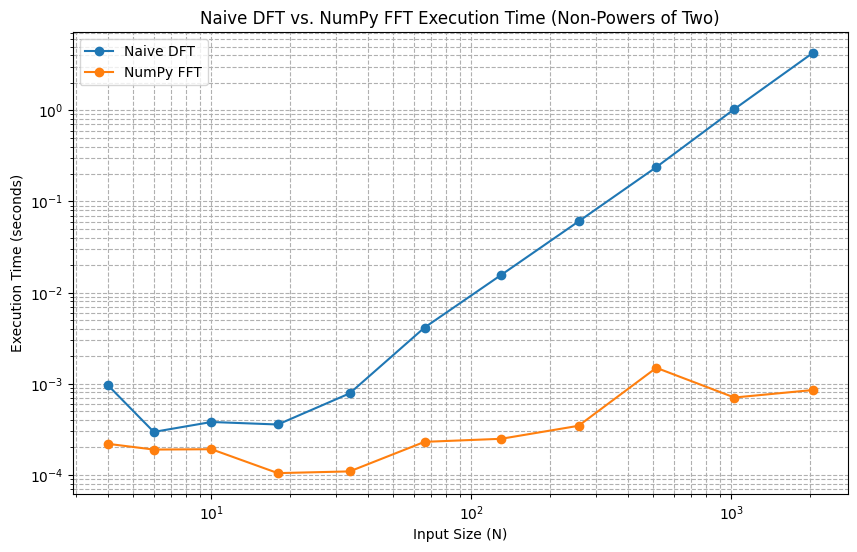

In [16]:
# Plot the execution times
plt.figure(figsize=(10, 6))
plt.plot(input_sizes_non_power, dft_times_non_power, marker='o', linestyle='-', label='Naive DFT')
plt.plot(input_sizes_non_power, fft_times_non_power, marker='o', linestyle='-', label='NumPy FFT')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Naive DFT vs. NumPy FFT Execution Time (Non-Powers of Two)')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()

**• Discuss how the FFT’s performance is affected for non-powers-of-two and compare it with the naive DFT.**
<br>

Based on the execution times and the plot for non-power-of-two input sizes, we can observe the following:

* **Naive DFT:** The execution time for the naive DFT still increases significantly as the input size (N) grows, similar to the power-of-two case. The time complexity remains O(N^2).
* **NumPy FFT:** For non-power-of-two input sizes, NumPy's FFT might be slightly slower compared to power-of-two sizes due to internal padding or different algorithms used for such sizes. However, it is still significantly faster than the naive DFT for larger input sizes. The time complexity is still much better than O(N^2).

Overall, the performance advantage of NumPy's FFT over the naive DFT is still evident for non-power-of-two input sizes, although the performance difference might be slightly less pronounced compared to the power-of-two case.

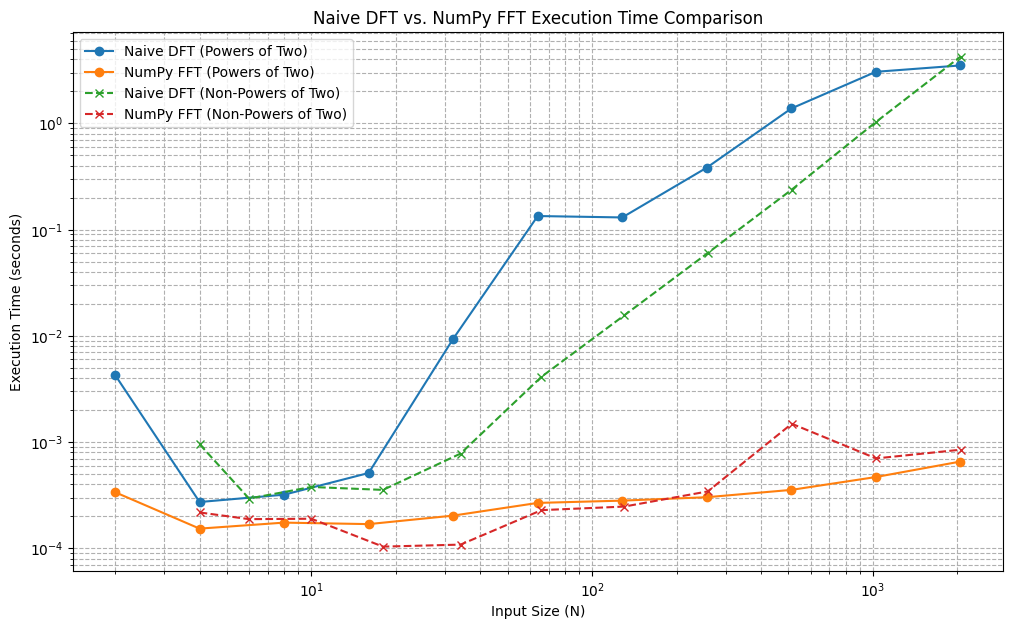

In [17]:
plt.figure(figsize=(12, 7))

plt.plot(input_sizes, dft_times, marker='o', linestyle='-', label='Naive DFT (Powers of Two)')
plt.plot(input_sizes, fft_times, marker='o', linestyle='-', label='NumPy FFT (Powers of Two)')

plt.plot(input_sizes_non_power, dft_times_non_power, marker='x', linestyle='--', label='Naive DFT (Non-Powers of Two)')
plt.plot(input_sizes_non_power, fft_times_non_power, marker='x', linestyle='--', label='NumPy FFT (Non-Powers of Two)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Naive DFT vs. NumPy FFT Execution Time Comparison')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()

**Comparison of Naive DFT and NumPy FFT Performance (Powers of Two vs. Non-Powers of Two)**

Based on the combined execution time plot, we can make the following observations:

* **Naive DFT:** The performance of the naive DFT is consistently and significantly slower than NumPy's FFT for both power-of-two and non-power-of-two input sizes, especially as the input size increases. Its execution time scales approximately as O(N^2) in both cases, as seen by the steep upward slope in the logarithmic plot. The input size being a power of two or not does not significantly impact the fundamental O(N^2) complexity of the naive implementation.

* **NumPy FFT (Powers of Two vs. Non-Powers of Two):** NumPy's FFT is substantially faster than the naive DFT for all tested input sizes. While the FFT algorithm has a theoretical time complexity of O(N log N), for non-power-of-two sizes, NumPy's implementation might experience a slight performance degradation compared to optimal power-of-two sizes. This can be attributed to the need for padding or using more general (and slightly less efficient) algorithms for non-power-of-two inputs.

    However, even with this potential slight performance impact for non-power-of-two sizes, NumPy's FFT remains significantly more efficient than the naive DFT. The logarithmic plot clearly shows that the FFT execution times (both for power-of-two and non-power-of-two) stay much lower than the naive DFT times, and their growth rate with N is much less steep.

In summary, the FFT provides a dramatic performance improvement over the naive DFT, regardless of whether the input size is a power of two. While the FFT's performance might be marginally better for power-of-two sizes due to algorithmic optimizations, it is still the vastly superior choice for larger input sizes, even when they are not powers of two. The performance difference becomes more pronounced as N increases, highlighting the importance of using efficient algorithms like the FFT for practical applications.

# (c) Insight and Analysis

**• Explain why FFT is particularly efficient for powers-of-two inputs.**

**Explanation for FFT Efficiency with Powers of Two**

The Fast Fourier Transform (FFT) gains its significant efficiency, particularly for input sizes that are powers of two ($N = 2^k$), from a divide-and-conquer approach. The most common algorithm for FFT, the Cooley-Tukey algorithm, recursively breaks down a DFT of size $N$ into two DFTs of size $N/2$. This recursive decomposition is most straightforward and efficient when $N$ is a power of two, as the process can continue until the subproblems are trivial (size 1 DFTs).

Here's a breakdown of why powers of two are ideal:

1.  **Recursive Decomposition:** A DFT of size $N$ can be split into even-indexed and odd-indexed terms. This allows the computation of an $N$-point DFT to be expressed in terms of two $N/2$-point DFTs.
2.  **Base Cases:** When $N$ is a power of two, this recursive splitting naturally leads to subproblems of sizes $N/2, N/4, N/8, ..., 2, 1$. The base case of a 1-point DFT is simply the input value itself, which is computationally trivial.
3.  **Structure and Twiddle Factors:** The recursive structure aligns perfectly with the properties of the complex exponential terms (often called "twiddle factors") used in the DFT formula. For powers of two, these twiddle factors have a highly regular and exploitable pattern that simplifies computations and reduces the number of redundant calculations.
4.  **Reduced Multiplications:** The naive DFT requires approximately $N^2$ complex multiplications and additions. The FFT, by exploiting the recursive structure and twiddle factor properties for power-of-two sizes, reduces the number of operations to approximately $O(N \log_2 N)$. The $\log_2 N$ term arises directly from the number of recursive decomposition stages, which is $k$ when $N = 2^k$.

While FFT algorithms exist for non-power-of-two sizes (often using techniques like padding the input to the next power of two or using more generalized algorithms like the prime-factor algorithm), they typically involve additional computational overhead compared to the highly optimized power-of-two case. The clean and symmetric recursive decomposition of the Cooley-Tukey algorithm is most naturally applied when the input size can be repeatedly divided by two until it reaches 1.

**• Discuss real-world implications: when might using a naive DFT still be acceptable or preferable?**

**Real-World Implications: When is Naive DFT Acceptable or Preferable?**

While the Fast Fourier Transform (FFT) offers significant performance advantages over the naive Discrete Fourier Transform (DFT), particularly for larger input sizes, there are a few scenarios in real-world applications where using a naive DFT might still be acceptable or even preferable:

*   **Very Small Input Sizes:** For very small input sizes (N), the overhead associated with the more complex FFT algorithm might outweigh its computational savings. In such cases, the difference in execution time between naive DFT and FFT is negligible, and the simplicity of the naive DFT implementation might be preferred for clarity and ease of understanding. As seen in the plots, for very small N, the execution times are quite close.

*   **Constraints on Algorithm Complexity:** In some highly specialized or resource-constrained environments (though less common with modern computing), the memory footprint or complexity of an FFT implementation might be a concern. A naive DFT might be simpler to implement and require less complex code, which could be a factor in very specific embedded systems or hardware implementations where every resource is critical.

*   **Specific Data Structures or Operations:** In rare cases, the nature of the data or the specific operations being performed might make a direct DFT calculation more straightforward or efficient than adapting the data for an FFT algorithm. This is not typical for general-purpose FFT applications but could arise in highly specialized signal processing tasks.


It's important to emphasize that these scenarios are exceptions rather than the rule. For most practical applications involving the Fourier Transform with input sizes beyond a few dozen points, the performance benefits of the FFT are overwhelming, making it the standard algorithm of choice. The O(N log N) complexity of the FFT scales much better with increasing input size compared to the O(N^2) complexity of the naive DFT.

 **• Extend the plot to show the ratio of execution times (DFT / FFT) versus N to visualize the speed-up factor.**

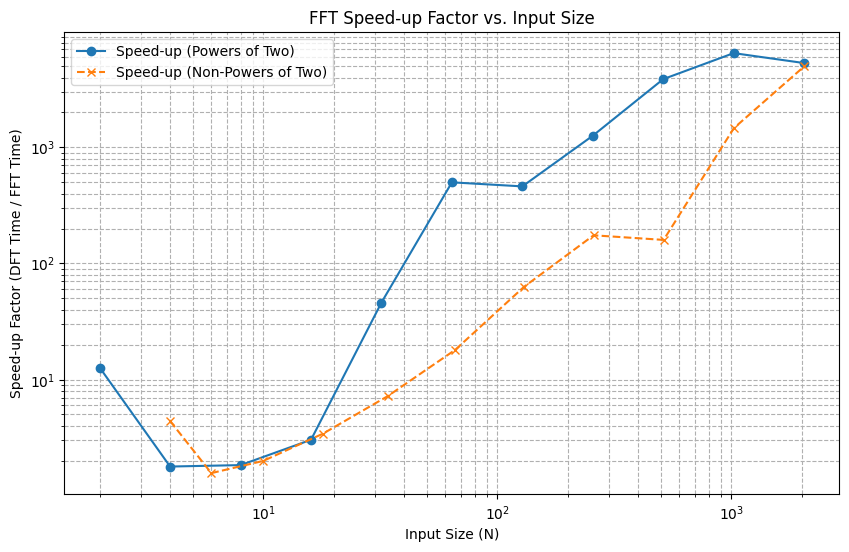

In [18]:
# Calculate the speed-up factor (DFT time / FFT time)
speedup_power_of_two = np.array(dft_times) / np.array(fft_times)
speedup_non_power_of_two = np.array(dft_times_non_power) / np.array(fft_times_non_power)

# Plot the speed-up factor
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, speedup_power_of_two, marker='o', linestyle='-', label='Speed-up (Powers of Two)')
plt.plot(input_sizes_non_power, speedup_non_power_of_two, marker='x', linestyle='--', label='Speed-up (Non-Powers of Two)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size (N)')
plt.ylabel('Speed-up Factor (DFT Time / FFT Time)')
plt.title('FFT Speed-up Factor vs. Input Size')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()

**Commentary on the FFT Speed-up Factor Plot**

The plot showing the ratio of execution times (Naive DFT / NumPy FFT), also known as the speed-up factor, clearly illustrates the significant performance advantage of the Fast Fourier Transform (FFT) over the naive Discrete Fourier Transform (DFT).

Key observations from the plot:

*   **Increasing Speed-up with Input Size:** For both power-of-two and non-power-of-two input sizes, the speed-up factor generally increases as the input size (N) grows. This confirms that the performance benefits of FFT become more pronounced for larger datasets.
*   **Higher Speed-up for Powers of Two (Generally):** The speed-up factor for power-of-two input sizes is generally higher than for non-power-of-two sizes, especially as N increases. This aligns with the earlier explanation that the Cooley-Tukey FFT algorithm is most efficient when the input size can be recursively divided by two.
*   **Significant Performance Difference for Larger N:** For larger input sizes, the speed-up factor reaches significant values, indicating that the FFT is orders of magnitude faster than the naive DFT. This is a crucial takeaway for practical applications, where efficiency is paramount.
*   **Variability for Non-Powers of Two:** The speed-up for non-powers-of-two sizes can be more variable compared to powers of two. This is likely due to the different strategies NumPy's FFT might employ for these sizes (e.g., padding), which can introduce some overhead. However, even with this variability, the speed-up is still substantial compared to the naive DFT.

In conclusion, the speed-up factor plot visually demonstrates the theoretical efficiency of the FFT. It highlights that while the FFT is always faster than the naive DFT for the tested range, its performance is typically best when the input size is a power of two. The ever-increasing speed-up with increasing N underscores why the FFT is the standard algorithm used in practice for Fourier analysis.